# Unsupervised Learning - Anomaly Detection

In [157]:
#https://thisdata.com/blog/unsupervised-machine-learning-with-one-class-support-vector-machines/
import numpy as np
import pandas as pd
%matplotlib inline
pd.options.mode.chained_assignment = None # for avoiding the warning

Extract data from csv file , and show some statistics

In [158]:
training = pd.read_csv('./data/kddcup.data_10_percent', delimiter=',', dtype=None)
print('NUMBER OF COLUMNS: ' + str(len(training.columns)))
training_stat = training.describe()
training_stat.transpose()

NUMBER OF COLUMNS: 42


,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101050,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


In [159]:
training.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [160]:
#len(training.loc[training.logged_in>0])
print("Number of datapoints: ", len(training))

('Number of datapoints: ', 494021)


Print the possible labels

In [161]:
print(set(training['label']))

set(['guess_passwd.', 'nmap.', 'loadmodule.', 'rootkit.', 'warezclient.', 'smurf.', 'pod.', 'neptune.', 'normal.', 'spy.', 'ftp_write.', 'phf.', 'portsweep.', 'teardrop.', 'buffer_overflow.', 'land.', 'imap.', 'warezmaster.', 'perl.', 'multihop.', 'back.', 'ipsweep.', 'satan.'])


Just reduce the dataset and extract the logged-in HTTP accesses from the data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


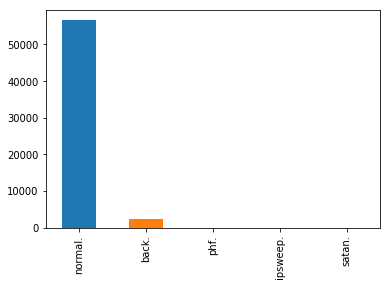

In [162]:
data = training
data = data[data['service'] == "http"]  
data = data[data["logged_in"] == 1]
#data = data[data["label"] == 'normal.']
data.label.value_counts().plot(kind='bar')  
data.head()

In [163]:
print("Number of (original) datapoints: ", len(training))
print("Number of (filetered) datapoints: ", len(data))

('Number of (original) datapoints: ', 494021)
('Number of (filetered) datapoints: ', 58725)


### Data Preprocessing

Extract only some possibly relevant features

In [164]:
Y = data[['label']]
relevant_features = ['src_bytes','dst_bytes','label']
data = data[relevant_features]
data.head()

,src_bytes,dst_bytes,label
0,181,5450,normal.
1,239,486,normal.
2,235,1337,normal.
3,219,1337,normal.
4,217,2032,normal.


Normalise the data - this leads to better accuracy and reduces numerical instability (especially in SVM)

In [166]:
#np.log((data["duration"] + 0.1).astype(float))
from sklearn import preprocessing
data["dst_bytes"] = preprocessing.minmax_scale(data["dst_bytes"])
#data["duration"] = preprocessing.minmax_scale(data["duration"])
data["src_bytes"] = preprocessing.minmax_scale(data["src_bytes"])

In [167]:
print("Normal datapoints: ", len(data.loc[data.label == "normal."]))
print("Anomalies: ", len(data.loc[data.label != "normal."]))

('Normal datapoints: ', 56516)
('Anomalies: ', 2209)


We're using a **one-class SVM**, so we need a single class. The dataset 'label' column contains multiple different categories of attacks, so to make use of this data in a one-class system we need to convert the attacks into
class 1 (*normal*) and class -1 (*attack*)

In [168]:
data.loc[data['label'] == "normal.", "attack"] = 1  
data.loc[data['label'] != "normal.", "attack"] = -1

# grab out the attack value as the target for training and testing. since we're
# only selecting a single column from the `data` dataframe, we'll just get a
# series, not a new dataframe
target = data['attack']
len(data)

# find the proportion of outliers we expect (aka where `attack == -1`). because 
# target is a series, we just compare against itself rather than a column.
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/np.float(target.shape[0]))



('outliers.shape', (2209,))
('outlier fraction', 0.03761600681140911)


Drop label columns from the dataframe. we're doing this so we can do unsupervised training with unlabelled data. we've already copied the label
out into the target series so we can compare against it later.

In [169]:
data.drop(["label", "attack"], axis=1, inplace=True)

Splitting data into training and tests sets

In [170]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)  
train_data.shape  

(46980, 2)

Now we train the model by calling the function **fit**. It accepts a few parameters but the most important is **nu** that must be between 0 and 1 and mainly represent the *proportion of outliers we expect in our data*.

In [200]:
from sklearn import svm

outliers_fraction = outliers.shape[0]/np.float(target.shape[0])
clf = svm.OneClassSVM(nu=outliers_fraction)
clf.fit(train_data)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.0376160068114, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

We now check the accuracy (how good it is at predicting the right class for data) of the model by using the **predict** function on our data and then use sklearn's built-in analysis functions to compare the labels between the predict output and our target, which we set up earlier on.

In [199]:
from sklearn import metrics  
preds = clf.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

('accuracy: ', 0.93903788846317582)
('precision: ', 0.96095179987797441)
('recall: ', 0.97626848490215179)
('f1: ', 0.96854959149609077)
('area under curve (auc): ', 0.49255902121213785)


In [29]:
test = np.array([0.1, 0.2, 0.2,0.4,-0.3])
#test = test.reshape(5,-1)
#print(test)
#scaler = preprocessing.StandardScaler()
#test = scaler.fit_transform(test)

test1 = preprocessing.scale(test)
print(test1)
test2 = preprocessing.minmax_scale(test)
print(test2)
test3 = preprocessing.normalize(test.reshape(len(test),-1))
print(test3.reshape(len(test)))
test4 = preprocessing.MinMaxScaler().fit_transform(test.reshape(len(test),-1))
print(test4.reshape(len(test)))


[-0.08638684  0.34554737  0.34554737  1.2094158  -1.81412369]
[ 0.57142857  0.71428571  0.71428571  1.          0.        ]
[ 1.  1.  1.  1. -1.]
[ 0.57142857  0.71428571  0.71428571  1.          0.        ]
